In [2]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.metrics import mean_squared_error

In [3]:
data = pd.read_csv('data/data.csv', header=None)
x, y = data.loc[:,0][:, np.newaxis], data.loc[:,1]#[:, np.newaxis]
# x = np.vstack([x, np.zeros(len(x))]).T

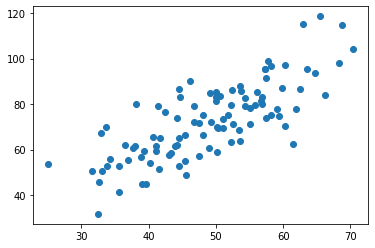

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(x[:,0], y)


In [5]:
def train(x, y, w):
    w += learning_rate * np.dot(x.T, (y - np.dot(x, w)) ) / len(x)
    y_pred = np.dot(x, w)
    loss = mean_squared_error(y_pred, y)
    return w, y_pred, loss

In [8]:
epoch = 100
learning_rate = 0.0001
w = np.zeros((1))
for i in range(epoch):
    w, y_pred, loss = train(x, y, w)
    if i%10==0:print(f'epoch {epoch} loss : {loss}')
print(w)

epoch 100 loss : 3187.062473138781
epoch 100 loss : 122.65543791095718
epoch 100 loss : 112.70061746902573
epoch 100 loss : 112.6682789288475
epoch 100 loss : 112.66817387610577
epoch 100 loss : 112.6681735348387
epoch 100 loss : 112.6681735337301
epoch 100 loss : 112.66817353372652
epoch 100 loss : 112.66817353372647
epoch 100 loss : 112.66817353372647
[1.47948973]


In [9]:
def closed_formula(x, y):
    return np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)

In [10]:
w = closed_formula(x, y)
print(w)

[1.47948973]


In [11]:
mean_squared_error(np.dot(x,w), y)

112.66817353372647

### exercise 2

In [12]:
from sklearn.model_selection import train_test_split
hotel = pd.read_csv('data/chicago_hotel_reviews.csv')

### using pipeline

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectPercentile, SelectKBest, chi2
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV


pipe = Pipeline([('tfidf', vectorizer), 
                ('select_p', SelectPercentile(f_regression)),
                ('linear regression', LinearRegression())]
               )
X_train, X_test, y_train, y_test = train_test_split(hotel.review, hotel.rating,test_size=0.2, random_state=24)

fit = pipe.fit(X_train, y_train)
mean_squared_error(y_test, pipe.predict(X_test))

### using grid search

In [43]:
Cs = list(range(10, 100, 10))
clf = GridSearchCV(estimator=pipe, param_grid=dict(select_p__percentile=Cs), cv=5, iid=False)
temp = clf.fit(X_train, y_train)

In [44]:
clf.best_score_, clf.best_params_

(0.3386363862363065, {'select_p__percentile': 90})

### low method

In [164]:
# from sklearn.feature_extraction.text import CountVectorizer
# vectorizer = CountVectorizer()
from sklearn.feature_extraction.text import TfidfVectorizer
vocab = set([oo for o in hotel.review for oo in o.split() ])

X_train, X_test, y_train, y_test = train_test_split(hotel.review, hotel.rating,test_size=0.2)
vectorizer = TfidfVectorizer(vocabulary=vocab)

X_train, X_test = vectorizer.fit_transform(X_train).toarray(), vectorizer.fit_transform(X_test).toarray()

In [197]:
from sklearn.linear_model import SGDRegressor
model = SGDRegressor()
clf = model.fit(X_train, y_train)

In [198]:
mean_squared_error(clf.predict(X_test), y_test)

1.0870999127927514

In [213]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import f_regression
s = SelectPercentile(f_regression, percentile=10)
s.fit_transform(X_train, y_train)
selection_list = s.get_support()

/Users/pengfei/miniconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/pengfei/miniconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/pengfei/miniconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/pengfei/miniconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [217]:
model = SGDRegressor()
clf = model.fit(X_train[:, selection_list], y_train)

In [220]:
mean_squared_error(model.predict(X_test[:, selection_list]), y_test)

1.0627833178011912